In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

Data Preprocessing

In [2]:
batch1 = pickle.load(open(r'.\Data\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [3]:
numBat1 = len(batch1.keys())
numBat1

41

In [4]:
batch2 = pickle.load(open(r'.\Data\batch2.pkl','rb'))

In [5]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [6]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [7]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [8]:
numBat2 = len(batch2.keys())
numBat2

43

In [9]:
batch3 = pickle.load(open(r'.\Data\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']

In [10]:
numBat3 = len(batch3.keys())
numBat3

40

In [11]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [12]:
bat_dict = {**batch1, **batch2, **batch3}

Text(0, 0.5, 'Discharge Capacity (Ah)')

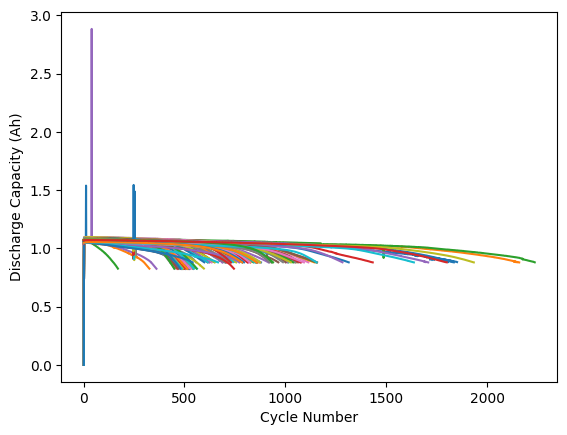

In [13]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

Text(0, 0.5, 'IR)')

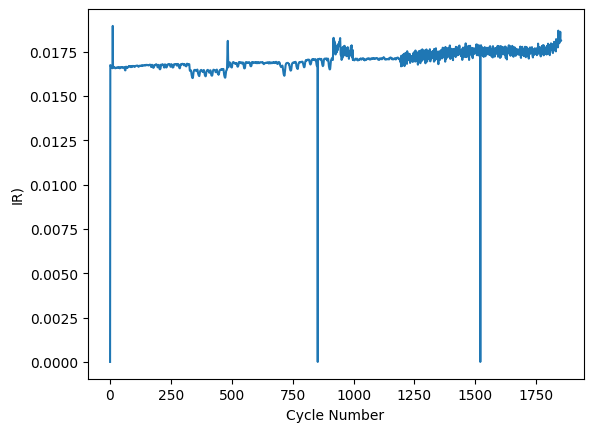

In [14]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['IR'])
    break
plt.xlabel('Cycle Number')
plt.ylabel('IR)')

Text(0, 0.5, 'Count)')

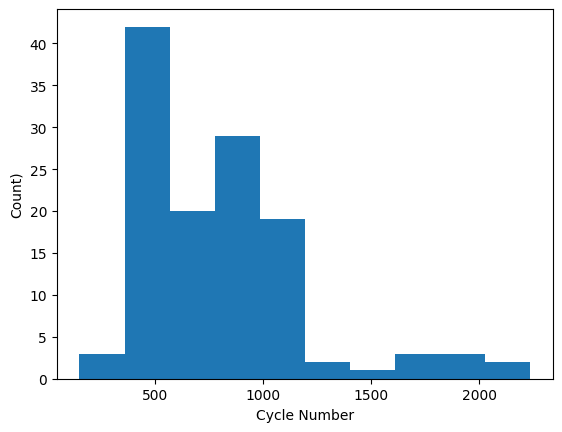

In [15]:
lifes = []
for i in bat_dict.keys():
    lifes.append(bat_dict[i]['cycle_life'][0][0])
plt.hist(lifes)
plt.xlabel('Cycle Number')
plt.ylabel('Count)')

In [16]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat);

In [17]:
test_ind

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

In [18]:
train_ind

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

In [19]:
bat_dict.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45', 'b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44', 'b2c45', 'b2c46', 'b2c47', 'b3c0', 'b3c1', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13', 'b3c14', 'b3c15', 'b3c16', 'b3c17', 'b3c18', 'b3c19', 'b3c20', 'b3c21', 'b3c22', 'b3c24', 'b3c25', 'b3c26', 'b3c27', 'b3c28', 'b3c29', 'b3c30

In [20]:
bat_dict[list(bat_dict.keys())[train_ind[0]]].keys()

dict_keys(['cycle_life', 'charge_policy', 'summary', 'cycles'])

In [21]:
bat_dict[list(bat_dict.keys())[train_ind[0]]]['cycles']['1']

{'I': array([ 0.        ,  0.21602891,  0.36033977, ..., -0.02976504,
        -0.02976504,  0.        ]),
 'Qc': array([0.0000000e+00, 1.0401919e-06, 1.0401919e-06, ..., 1.0750588e+00,
        1.0750588e+00, 1.0750588e+00]),
 'Qd': array([0.0000000e+00, 6.3991529e-10, 6.3991529e-10, ..., 1.0753012e+00,
        1.0753012e+00, 1.0753012e+00]),
 'Qdlin': array([-4.60029029e-04, -4.18311490e-04, -3.78267329e-04, -3.39760519e-04,
        -3.02655034e-04, -2.66814849e-04, -2.32103937e-04, -1.98386272e-04,
        -1.65525828e-04, -1.33386579e-04, -1.01832499e-04, -7.07275611e-05,
        -3.99357398e-05, -9.32100884e-06,  2.12526579e-05,  5.19212866e-05,
         8.28209033e-05,  1.14087534e-04,  1.45857205e-04,  1.78265943e-04,
         2.11449772e-04,  2.45509130e-04,  2.80415455e-04,  3.16110962e-04,
         3.52537867e-04,  3.89638384e-04,  4.27354728e-04,  4.65629442e-04,
         5.04440503e-04,  5.43832674e-04,  5.83858116e-04,  6.24568988e-04,
         6.66017451e-04,  7.08255664e-0

In [22]:
import pandas as pd

In [23]:
bat_dict[list(bat_dict.keys())[train_ind[0]]]['summary']

{'IR': array([0.        , 0.01703883, 0.0170098 , ..., 0.01845019, 0.01840404,
        0.01872855]),
 'QC': array([0.        , 1.0750588 , 1.0764499 , ..., 0.88078576, 0.88081503,
        0.88001752]),
 'QD': array([0.        , 1.0753012 , 1.0766124 , ..., 0.88064426, 0.88023162,
        0.88000232]),
 'Tavg': array([ 0.        , 31.66884408, 31.72273994, ..., 32.54124006,
        32.25505305, 32.38681994]),
 'Tmin': array([ 0.      , 29.853098, 29.857759, ..., 29.824532, 30.077488,
        30.240738]),
 'Tmax': array([ 0.      , 34.307796, 34.418705, ..., 36.202057, 34.37606 ,
        35.359276]),
 'chargetime': array([ 0.        , 13.42605667, 13.34152   , ..., 21.04236833,
        21.24845833, 24.04698833]),
 'cycle': array([1.000e+00, 2.000e+00, 3.000e+00, ..., 2.157e+03, 2.158e+03,
        2.159e+03])}

In [24]:
cycles = []
IR = []
QC = []
QD = []
Tavg = []
Tmin = []
Tmax = []
chargetime = []
ind = 0
index = []
cycle_life = []
for i in bat_dict.keys():
    cycles.extend(bat_dict[i]['summary']['cycle'])
    IR.extend(bat_dict[i]['summary']['IR'])
    QC.extend(bat_dict[i]['summary']['QC'])
    QD.extend(bat_dict[i]['summary']['QD'])
    Tavg.extend(bat_dict[i]['summary']['Tavg'])
    Tmin.extend(bat_dict[i]['summary']['Tmin'])
    Tmax.extend(bat_dict[i]['summary']['Tmax'])
    chargetime.extend(bat_dict[i]['summary']['chargetime'])
    index.extend([ind] * len(bat_dict[i]['summary']['cycle']))
    cycle_life.extend([bat_dict[i]['cycle_life'][0][0]] * len(bat_dict[i]['summary']['cycle']))
    ind += 1


In [25]:
df = pd.DataFrame()
df['id'] = index
df['cycle'] = cycles
df['IR'] = IR
df['QC'] = QC
df['QD'] = QD
df['Tavg'] = Tavg
df['Tmin'] = Tmin
df['Tmax'] = Tmax
df['chargetime'] = chargetime
df['cycle_life'] = cycle_life

In [26]:
import seaborn as sb
from matplotlib import pyplot

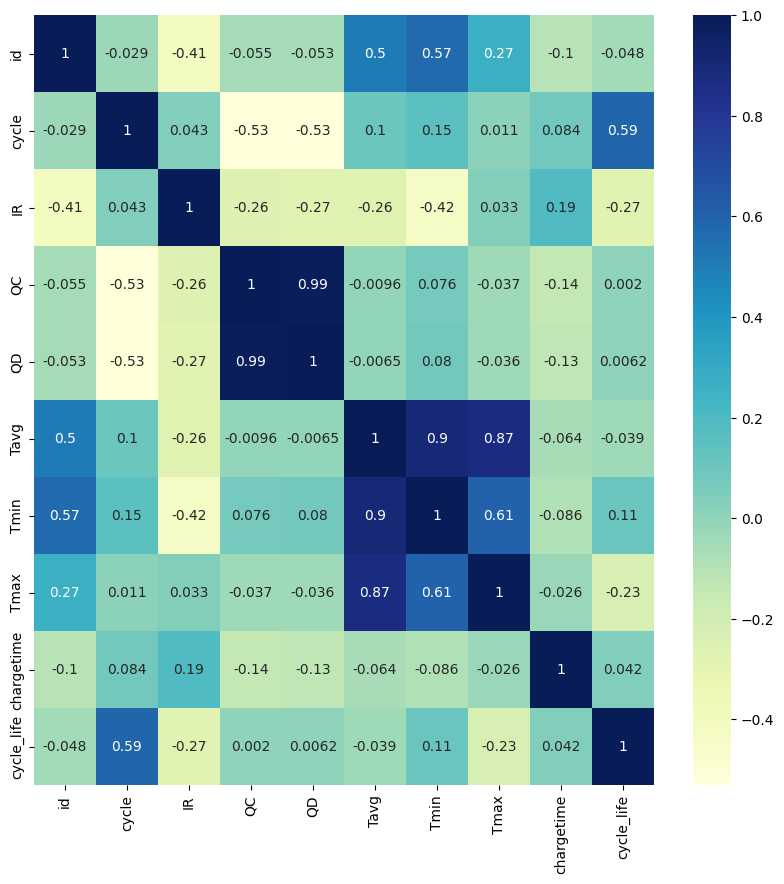

In [27]:
pyplot.figure(figsize=(10, 10))
df.corr()
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)


In [28]:
df.describe()

,id,cycle,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle_life
count,100501.000000,100501.000000,100501.000000,100501.000000,100501.000000,100501.000000,100501.000000,100501.000000,100501.000000,100501.000000
mean,62.377051,490.156615,0.016629,1.031048,1.030881,34.069687,31.212060,37.791954,11.171436,974.163013
std,40.362826,388.039203,0.001370,0.056753,0.056205,2.012331,1.633117,2.647476,6.581179,466.673680
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,148.000000
25%,23.000000,203.000000,0.015571,1.014073,1.013984,32.835144,30.074018,36.183933,10.049835,636.000000
50%,66.000000,409.000000,0.016601,1.048886,1.049053,33.899730,30.950415,38.023376,10.334992,862.000000
75%,99.000000,675.000000,0.017355,1.067319,1.067586,35.347254,32.350765,39.705406,11.430038,1093.000000
max,123.000000,2236.000000,0.024405,2.965895,2.884085,39.586732,35.807240,43.772045,1290.370762,2237.000000


In [29]:
df.to_csv('df.csv')

In [30]:
df['percent'] = df['cycle']/df['cycle_life']

In [31]:
df.loc[df['percent'] < 0.3, 'condition'] = '2'
df.loc[df['percent'] >= 0.3, 'condition'] = '1'
df.loc[df['percent'] >= 0.7, 'condition'] = '0'

In [32]:
df.head(10)

,id,cycle,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle_life,percent,condition
0,0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1852.0,0.00054,2
1,0,2.0,0.016742,1.071042,1.070689,31.875011,29.566130,35.652016,13.341250,1852.0,0.00108,2
2,0,3.0,0.016724,1.071674,1.071900,31.931490,29.604385,35.692978,13.425777,1852.0,0.00162,2
3,0,4.0,0.016681,1.072304,1.072510,31.932603,29.744202,35.680588,13.425167,1852.0,0.00216,2
4,0,5.0,0.016662,1.072970,1.073174,31.959322,29.644709,35.728691,13.341442,1852.0,0.00270,2
5,0,6.0,0.016623,1.073491,1.073576,31.961062,29.752932,35.711758,13.340835,1852.0,0.00324,2
6,0,7.0,0.016600,1.073922,1.073992,31.900562,29.564377,35.615650,13.340198,1852.0,0.00378,2
7,0,8.0,0.016577,1.074158,1.074374,31.921668,29.628630,35.546783,13.425442,1852.0,0.00432,2
8,0,9.0,0.016588,1.074337,1.074492,31.870082,29.597345,35.539406,13.425190,1852.0,0.00486,2
9,0,10.0,0.016572,1.074353,1.074537,31.841053,29.687315,35.499729,13.425633,1852.0,0.00540,2


In [33]:
df['id'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123], dtype=int64)

In [34]:
a = df.loc[df['id'] == 10][df['cycle'] == 10]['IR']
b = df.loc[df['id'] == 10][df['cycle'] == 100]['IR']

C:\Users\a8196\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\a8196\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [35]:
float(b)-float(a)

0.00012491199999999786

In [36]:
train = df.copy()
train = train[train['id'].isin(train_ind)]

In [37]:
X = train.copy()
y = train['cycle_life']
del X['cycle_life']
del X['condition']
y_condition = train['condition']

In [37]:
del X['percent']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1)

In [151]:
X_train

,cycle,IR,QC,QD,Tavg,Tmin,Tmax,chargetime
38393,164.0,0.017511,1.067588,1.068173,33.492411,29.713892,39.237923,10.151680
16893,632.0,0.017318,1.036309,1.036399,32.786451,29.565428,37.196392,10.179823
26428,376.0,0.015941,1.064770,1.065002,36.662598,33.429768,40.883049,10.096775
37865,132.0,0.017886,1.022040,1.021838,30.406706,27.238718,32.036320,10.818142
38581,352.0,0.018980,1.006684,1.006389,33.102315,28.882753,40.273430,11.155237
...,...,...,...,...,...,...,...,...
23267,700.0,0.017216,1.018677,1.013312,34.201015,30.691271,38.752831,10.871935
36662,142.0,0.017699,1.082543,1.082759,32.669001,30.011120,36.819595,11.246028
11622,528.0,0.016546,1.065566,1.065422,32.455564,29.390121,37.191021,10.247963
26241,189.0,0.016256,1.076551,1.076777,33.882529,30.611652,37.851082,10.179808


In [43]:
y_train

38393     438.0
16893     857.0
26428     709.0
37865     300.0
38581     438.0
          ...  
23267     870.0
36662     616.0
11622     870.0
26241     709.0
2086     2160.0
Name: cycle_life, Length: 19726, dtype: float64

In [44]:
regr = RandomForestRegressor(max_depth=5, random_state=1)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=1)

In [45]:
regr.score(X,y)

0.9655175660754692

In [46]:
from sklearn.metrics import mean_squared_error


In [47]:
ypred = regr.predict(X_train)
mse = mean_squared_error(y_train, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 


MSE:  7169.17936099061
RMSE:  84.67100661377901


In [48]:
regr.decision_path

<bound method BaseForest.decision_path of RandomForestRegressor(max_depth=5, random_state=1)>

In [51]:

ypred = regr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 


MSE:  7586.114528107901
RMSE:  87.09830381877651


In [52]:
from sklearn.linear_model import LinearRegression
log_y=np.log(y)
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.6583806893041406

In [53]:
ypred = reg.predict(X)
mse = mean_squared_error(y, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  72264.62170068946
RMSE:  268.8207984897922


In [54]:
ypred = reg.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  75396.50056544707
RMSE:  274.5842321864951


In [152]:
from sklearn.neural_network import MLPRegressor

In [153]:
regr = MLPRegressor(hidden_layer_sizes = (32,64,32), random_state=1, max_iter=1000, alpha=0.001)

In [154]:
regr.fit(X_train, y_train)

MLPRegressor(alpha=0.001, hidden_layer_sizes=(32, 64, 32), max_iter=1000,
             random_state=1)

In [155]:
regr.score(X_train, y_train)

0.8888839768296926

In [156]:
ypred = regr.predict(X_train)
mse = mean_squared_error(y_train, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 


MSE:  23179.41859862601
RMSE:  152.2478853666809


In [157]:

ypred = regr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  23497.614839581754
RMSE:  153.28931743465282


In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
clf = RandomForestClassifier(max_depth=5, random_state=0)

In [160]:

X_train, X_test, y_train, y_test = train_test_split(X, y_condition, train_size = 0.7, random_state = 1)

In [161]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [162]:
clf.score(X_train,y_train)

0.9391158876609551

In [163]:
clf.score(X_test,y_test)

0.9350603264726757

In [164]:
X_train

,cycle,IR,QC,QD,Tavg,Tmin,Tmax,chargetime
38393,164.0,0.017511,1.067588,1.068173,33.492411,29.713892,39.237923,10.151680
16893,632.0,0.017318,1.036309,1.036399,32.786451,29.565428,37.196392,10.179823
26428,376.0,0.015941,1.064770,1.065002,36.662598,33.429768,40.883049,10.096775
37865,132.0,0.017886,1.022040,1.021838,30.406706,27.238718,32.036320,10.818142
38581,352.0,0.018980,1.006684,1.006389,33.102315,28.882753,40.273430,11.155237
...,...,...,...,...,...,...,...,...
23267,700.0,0.017216,1.018677,1.013312,34.201015,30.691271,38.752831,10.871935
36662,142.0,0.017699,1.082543,1.082759,32.669001,30.011120,36.819595,11.246028
11622,528.0,0.016546,1.065566,1.065422,32.455564,29.390121,37.191021,10.247963
26241,189.0,0.016256,1.076551,1.076777,33.882529,30.611652,37.851082,10.179808


In [165]:
from sklearn.neural_network import MLPClassifier

In [240]:
clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(16, 32, 16), random_state=1, max_iter=1000, early_stopping = False, validation_fraction=0.1)

In [241]:
clf.fit(X_train.values,y_train.values)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 32, 16), max_iter=1000,
              random_state=1)

In [242]:
clf.score(X_train.values,y_train)

0.8666227314204603

In [243]:
clf.score(X_test.values,y_test)

0.8665720369056068

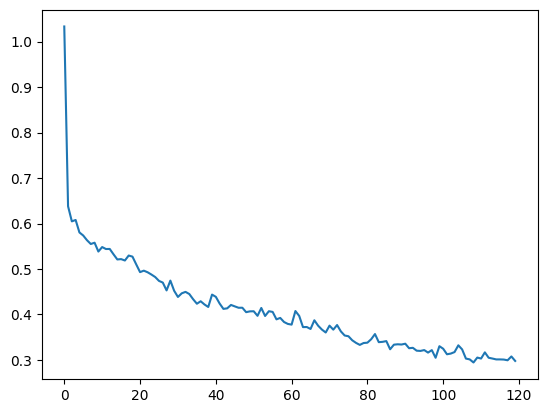

In [239]:
import matplotlib.pyplot as plt
loss_values = clf.loss_curve_
plt.plot(loss_values)
# plt.plot(clf.validation_scores_)
plt.show()